# System 1

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.regularizers import l2
from keras.layers import Dropout

import math

In [ ]:
df = pd.read_excel("Combined D2.xlsx")
#df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head()

pd.options.display.float_format = '{:,.12f}'.format
df = df.astype(float)
df.head()

,a1,b,c,a2,a3,E
0,0.964748615704,0.000000057208,0.000572082380,0.000000000000,0.000000000000,1.038461538462
1,0.945597498016,0.000000057703,0.000577034045,0.000000000000,0.000000000000,1.045507584597
2,0.930814419855,0.000000058377,0.000583771162,0.000000000000,0.000000000000,1.041714947856
3,0.877973183178,0.000000059067,0.000590667454,0.000000000000,0.000000000000,1.067216981132
4,0.939000057514,0.000000058038,0.000580383053,0.000000000000,0.000000000000,1.057210965435


In [ ]:
x = df.iloc[:, 0:5]
y = df.iloc[:, -1]
x.head()
# y.head()

,a1,b,c,a2,a3
0,0.964748615704,0.000000057208,0.000572082380,0.000000000000,0.000000000000
1,0.945597498016,0.000000057703,0.000577034045,0.000000000000,0.000000000000
2,0.930814419855,0.000000058377,0.000583771162,0.000000000000,0.000000000000
3,0.877973183178,0.000000059067,0.000590667454,0.000000000000,0.000000000000
4,0.939000057514,0.000000058038,0.000580383053,0.000000000000,0.000000000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=43)

In [ ]:

reg = Sequential()

op = tf.keras.optimizers.Adam(learning_rate=0.001)

2023-01-22 18:26:18.422399: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-22 18:26:18.423851: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/trish/drone_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu/gazebo-11/plugins
2023-01-22 18:26:18.425153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/trish/drone_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu/gaz

In [ ]:
reg.add(Dense(units=5, input_dim=5,  activation = 'relu'))
#reg.add(Dropout(0.2))
reg.add(Dense(units=3,  activation = 'relu'))
#reg.add(Dense(units=3,  activation = 'tanh', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
reg.add(Dense(units=1,  activation = 'linear'))
reg.compile(optimizer= op ,loss='mse', metrics=['MAE'])

In [ ]:
history = reg.fit(x_train, y_train ,batch_size = 1, epochs = 200, verbose=1, validation_data=(x_test, y_test))

Epoch 1/200
53/53 [==============================] - 1s 4ms/step - loss: 0.7821 - MAE: 0.8206 - val_loss: 0.6816 - val_MAE: 0.7865
Epoch 2/200
53/53 [==============================] - 0s 2ms/step - loss: 0.5208 - MAE: 0.6648 - val_loss: 0.4396 - val_MAE: 0.6317
Epoch 3/200
53/53 [==============================] - 0s 2ms/step - loss: 0.3358 - MAE: 0.5285 - val_loss: 0.2898 - val_MAE: 0.4993
Epoch 4/200
53/53 [==============================] - 0s 2ms/step - loss: 0.2233 - MAE: 0.4201 - val_loss: 0.1937 - val_MAE: 0.3968
Epoch 5/200
53/53 [==============================] - 0s 2ms/step - loss: 0.1569 - MAE: 0.3302 - val_loss: 0.1330 - val_MAE: 0.3210
Epoch 6/200
53/53 [==============================] - 0s 2ms/step - loss: 0.1166 - MAE: 0.2618 - val_loss: 0.1014 - val_MAE: 0.2619
Epoch 7/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0948 - MAE: 0.2145 - val_loss: 0.0818 - val_MAE: 0.2141
Epoch 8/200
53/53 [==============================] - 0s 2ms/step - loss: 0.0832 - M

In [ ]:
#reg.evaluate(x_test, y_test)

In [ ]:
y_pred=reg.predict(x_test)
y_pred_train = reg.predict(x_train)

2/2 [==============================] - 0s 2ms/step


In [ ]:
print(y_test)
print(y_pred.T)

26   1.267352185090
5    1.118686868687
48   1.104294478528
40   0.962585034014
22   1.081140350877
65   1.027554535017
33   1.101572817865
19   1.163170163170
14   1.324701195219
60   1.005720823799
13   1.321305841924
43   1.047040971168
18   1.209677419355
54   1.056976744186
Name: E, dtype: float64
[[1.1563106  1.0922308  1.060587   1.0045841  1.0256792  1.0125126
  1.0269114  1.1279764  1.3491008  0.99596345 1.3068907  0.97372085
  1.2192128  1.0562345 ]]


In [ ]:
Accuracy_percent = (r2_score(y_train, y_pred_train ))*100
print(Accuracy_percent)

78.63071004737373


In [ ]:
Accuracy_percent = (r2_score(y_test, y_pred))*100
print(Accuracy_percent)

80.5855935256746


1/1 [==============================] - 0s 108ms/step - loss: 0.0024 - MAE: 0.0383


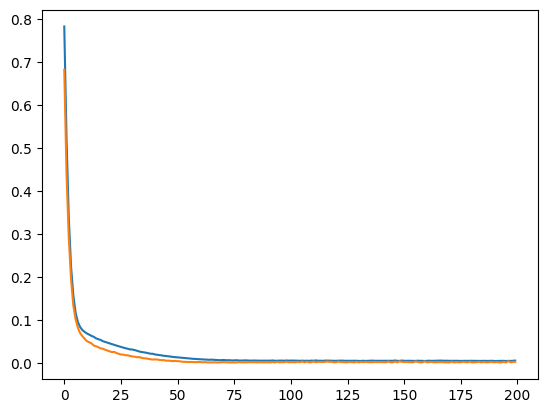

In [ ]:
hist = reg.evaluate(x=x_test, y=y_test)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
wt,bs=[],[]
for layerNum, layer in enumerate(reg.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    wt.append(weights)
    bs.append(biases)
P = wt[0].T
Q = wt[1].T
R = wt[2].T
b1 = bs[0]
b2 = bs[1]
b3 = bs[2]

In [ ]:
from IPython.display import display, Math, Latex

display(Latex(r"""\begin{align*}
      f(x) = R\times\Big(max\big(0, \big\{Q\times max(0, P\times x + b_{1}\big) + b_{2}\big\}\big)\Big) + b_{3}
\end{align*}"""))
display(Latex(r"""\begin{align*} Where, \end{align*}"""))
def array_to_bmatrix(var, array):
    bgn = '\\begin{align*} \n'
    bgn1 = var + ' = '
    begin = '\\begin{bmatrix} \n'
    data = ''
    for line in array:
        if line.size == 1:
            data = data + ' %.3f &'%line
            data = data + r' \\'
            data = data + '\n'
            continue
        for element in line:
            data = data + ' %.3f &'%element

        data = data + r' \\'
        data = data + '\n'
    end = '\end{bmatrix}'
    end1 = '\end{align*}'
    return (bgn + bgn1 + begin + data + end+end1)

def show(a,b):
    bgn = '\\begin{align*} \n'
    bd = ''
    bd = bd + a + ', & \quad'+ b

    # body = body + b3l + ' & ' + b2l
    end =  '\end{align*}'
    return (bgn+bd+end)


Rl = array_to_bmatrix('R',R); b3l = array_to_bmatrix('b3', b3)
Ql = array_to_bmatrix('Q',Q); b2l = array_to_bmatrix('b2', b2)
Pl = array_to_bmatrix('P',P); b1l = array_to_bmatrix('b1', b1)

display(Latex(show(Pl,b1l)))
display(Latex(show(Ql,b2l)))
display(Latex(show(Rl,b3l)))



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Text(0.5, 1.0, 'Combined D2')

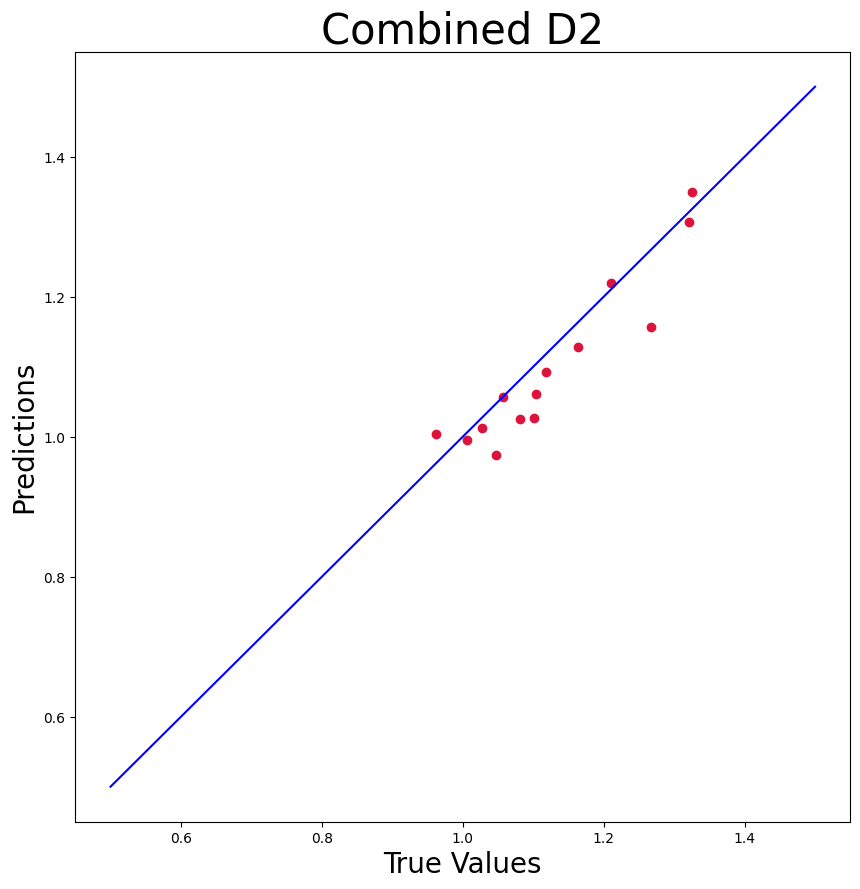

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, color = 'crimson')
plt.plot( [0.5,1.5], [0.5,1.5], color = 'blue')
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predictions', fontsize=20)
plt.title('Combined D2', fontsize=30)

In [ ]:
a1_weight=0
b_weight=0
c_weight=0
a2_weight=0
a3_weight=0
for i in range(len(P)):
    # a_weight += P[i][0]
    # b_weight+= P[i][1]
    # c_weight+= P[i][2]

    a1_weight += abs(P[i][0])
    b_weight+= abs(P[i][1])
    c_weight+= abs(P[i][2])
    a2_weight += abs(P[i][0])
    a3_weight += abs(P[i][0])

print(a1_weight,b_weight, c_weight, a2_weight, a3_weight)
sum=a1_weight+b_weight+c_weight+a2_weight+a3_weight

print("percentage : ", a1_weight*100/sum, b_weight*100/sum, c_weight*100/sum, a2_weight*100/sum, a3_weight*100/sum)

2.5587093979120255 1.375760480761528 2.1410044878721237 2.5587093979120255 2.5587093979120255
percentage :  22.860125266935924 12.291375078847405 19.128249120344826 22.860125266935924 22.860125266935924


1/1 [==============================] - 0s 18ms/step
[14.09629713  4.93393286  2.84196774  6.49035895  6.12014342]


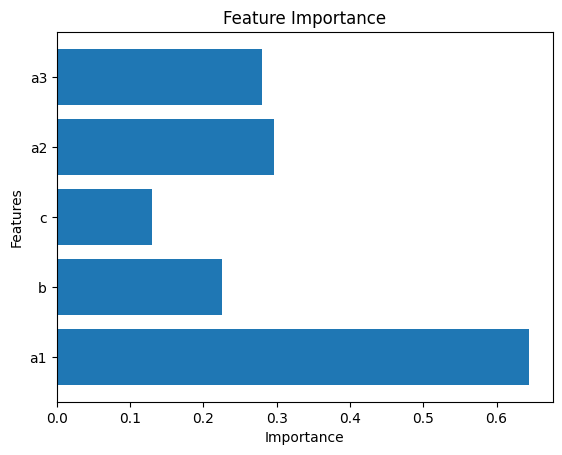

In [ ]:

import eli5
import sklearn
from eli5.permutation_importance import get_score_importances

def score(x,y):
    y_pred = reg.predict(x)
    return r2_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, np.array(x_test), y_test,)

feature_importances = np.mean(score_decreases, axis=0)
print(feature_importances)

sum = feature_importances[0]+feature_importances[1]+feature_importances[2]
a1_percent = feature_importances[0]/sum
b_percent = feature_importances[1]/sum
c_percent = feature_importances[2]/sum
a2_percent = feature_importances[3]/sum
a3_percent = feature_importances[4]/sum



_features = ['a1','b','c','a2','a3']
importance = [a1_percent, b_percent, c_percent, a2_percent, a3_percent]
plt.barh(_features, importance)
plt.ylabel("Features")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()